<a href="https://colab.research.google.com/github/kavita2776/Deep-learning-project/blob/main/covid_prediction_using_dl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget http://cb.lk/covid_19

--2022-08-21 09:38:54--  http://cb.lk/covid_19
Resolving cb.lk (cb.lk)... 172.67.187.81, 104.21.72.203, 2606:4700:3032::ac43:bb51, ...
Connecting to cb.lk (cb.lk)|172.67.187.81|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://cb.lk/covid_19 [following]
--2022-08-21 09:38:54--  https://cb.lk/covid_19
Connecting to cb.lk (cb.lk)|172.67.187.81|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/s/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip?dl=0 [following]
--2022-08-21 09:38:55--  https://www.dropbox.com/s/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip [following]
--2022-08

In [ ]:
!unzip covid_19

Archive:  covid_19
  inflating: CovidDataset/Val/Covid/88de9d8c39e946abd495b37cd07d89e5-6531-0.jpg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-8.jpg  
  inflating: CovidDataset/Val/Covid/85E52EB3-56E9-4D67-82DA-DEA247C82886.jpeg  
  inflating: CovidDataset/Val/Covid/4-x-day1.jpg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-53.jpg  
  inflating: CovidDataset/Val/Covid/4e43e48d52c9e2d4c6c1fb9bc1544f_jumbo.jpeg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-35-1.jpg  
  inflating: CovidDataset/Val/Covid/53EC07C9-5CC6-4BE4-9B6F-D7B0D72AAA7E.jpeg  
  inflating: CovidDataset/Val/Covid/6CB4EFC6-68FA-4CD5-940C-BEFA8DAFE9A7.jpeg  
  inflating: CovidDataset/Val/Covid/58cb9263f16e94305c730685358e4e_jumbo.jpeg  
  inflating: CovidDataset/Val/Covid/6b3bdbc31f65230b8cdcc3cef5f8ba8a-40ac-0.jpg  
  inflating: CovidDataset/Val/Covid/auntminnie-d-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg  
  inflating: CovidDataset/Val/Covid/6b44464d-73a7-4cf3-bbb6-ffe7

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image


In [ ]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3, 3),activation = 'relu', input_shape=(224, 224, 3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation ='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy,optimizer='adam',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 conv2d_4 (Conv2D)           (None, 220, 220, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 110, 110, 64)     0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 110, 110, 64)      0         
                                                                 
 conv2d_5 (Conv2D)           (None, 108, 108, 64)      36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                  

In [ ]:
#train from scartch
train_datagen = image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
)

test_dataset = image.ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    '/content/CovidDataset/Train',
    target_size = (224,224),
    batch_size= 32,
    class_mode = 'binary')

Found 224 images belonging to 2 classes.


In [ ]:
validation_generator = test_dataset.flow_from_directory(
    '/content/CovidDataset/Val',
    target_size= (224,224),
    batch_size = 32,
    class_mode = 'binary')

Found 60 images belonging to 2 classes.


In [ ]:
hist = model.fit_generator(
    train_generator,
    steps_per_epoch =7,
    epochs = 10,
    validation_data = validation_generator,
    validation_steps = 2
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/10
7/7 [==============================] - 75s 10s/step - loss: 0.6646 - accuracy: 0.6473 - val_loss: 0.6338 - val_accuracy: 0.9167
Epoch 2/10
7/7 [==============================] - 72s 10s/step - loss: 0.4746 - accuracy: 0.8259 - val_loss: 0.4482 - val_accuracy: 0.9667
Epoch 3/10
7/7 [==============================] - 74s 10s/step - loss: 0.3215 - accuracy: 0.8705 - val_loss: 0.1568 - val_accuracy: 0.9500
Epoch 4/10
7/7 [==============================] - 72s 10s/step - loss: 0.2386 - accuracy: 0.9107 - val_loss: 0.1735 - val_accuracy: 0.9667
Epoch 5/10
7/7 [==============================] - 73s 10s/step - loss: 0.1311 - accuracy: 0.9330 - val_loss: 0.0956 - val_accuracy: 0.9833
Epoch 6/10
7/7 [==============================] - 72s 10s/step - loss: 0.1310 - accuracy: 0.9643 - val_loss: 0.0777 - val_accuracy: 0.9833
Epoch 7/10
7/7 [==============================] - 73s 10s/step - loss: 0.1399 - accuracy: 0.9598 - val_loss: 0.2067 - val_accuracy: 0.9500
Epoch 8/10
7/7 [===========

In [ ]:
model.save('model_adv.h5')

In [ ]:
model.evaluate_generator(train_generator)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


[0.056552741676568985, 0.9821428656578064]

In [ ]:
model.evaluate_generator(validation_generator)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


[0.0638752207159996, 0.9666666388511658]

In [ ]:
model = load_model('model_adv.h5')

In [ ]:
import os


In [ ]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [ ]:
y_actual = []
y_test = []

In [ ]:
from PIL import Image
for i in os.listdir("/content/CovidDataset/Val/Normal/"):
  img = image.load_img("/content/CovidDataset/Val/Normal/"+i, target_size = (224, 224))
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis=0)
  p = model.predict(img)
  y_test.append(p[0,0])
  y_actual.append(1)

In [ ]:
for i in os.listdir("/content/CovidDataset/Val/Covid/"):
  img = image.load_img("/content/CovidDataset/Val/Covid/"+i, target_size = (224, 224))
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis=0)
  p = model.predict(img)
  y_test.append(p[0,0])
  y_actual.append(0)

In [ ]:
y_actual = np.array(y_actual)
y_test = np.array(y_test)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
cm = confusion_matrix(y_actual, y_test)

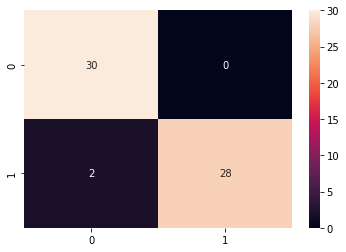

In [ ]:
import seaborn as sns
sns.heatmap(cm, cmap = None, annot = True)

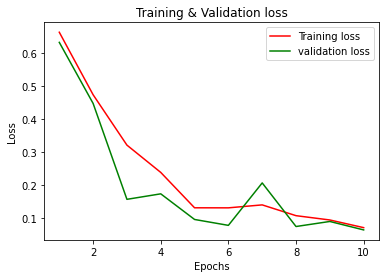

In [ ]:
import matplotlib.pyplot as plt
loss = hist.history['loss']
val_loss = hist.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, color ='red', label='Training loss')
plt.plot(epochs, val_loss, color='green', label = 'validation loss')
plt.title('Training & Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


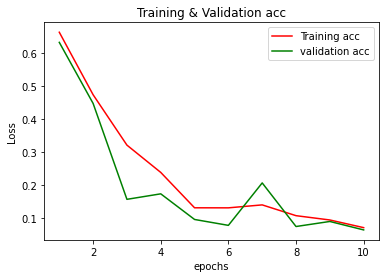

In [ ]:
import matplotlib.pyplot as plt
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
plt.plot(epochs, loss, color ='red', label='Training acc')
plt.plot(epochs, val_loss, color='green', label = 'validation acc')
plt.title('Training & Validation acc')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


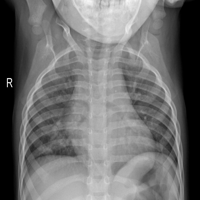

Radiologist: covid-19 -ve
CNN Model: COVID-19 -ve


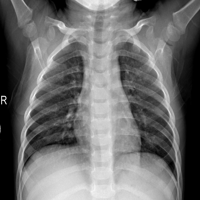

Radiologist: covid-19 -ve
CNN Model: COVID-19 -ve


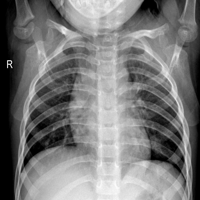

Radiologist: covid-19 -ve
CNN Model: COVID-19 -ve


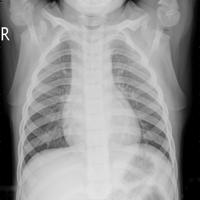

Radiologist: covid-19 -ve
CNN Model: COVID-19 -ve


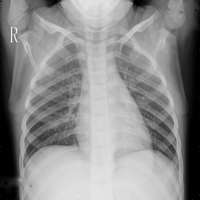

Radiologist: covid-19 -ve
CNN Model: COVID-19 -ve


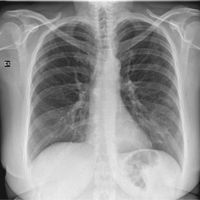

Radiologist: Covid-19 +ve
CNN Model : covid-19 +ve


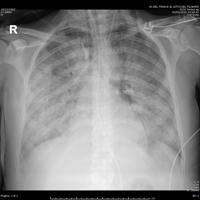

Radiologist: Covid-19 +ve
CNN Model : covid-19 +ve


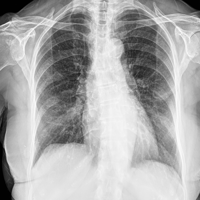

Radiologist: Covid-19 +ve
CNN Model : covid-19 +ve


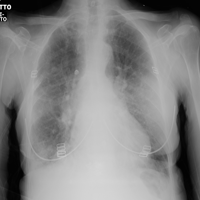

Radiologist: Covid-19 +ve
CNN Model : covid-19 +ve


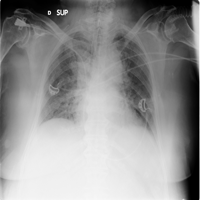

Radiologist: Covid-19 +ve
CNN Model : covid-19 +ve


In [ ]:
class color:
  GREEN = '\033[92m'
  RED = '\033[91m'

from PIL import Image
j = 0
for i in os.listdir("/content/CovidDataset/Val/Normal/"):
  j = j+1
  pil_img =Image.open('/content/CovidDataset/Val/Normal/'+i)
  im = pil_img
  size = (200, 200)#imagesize

  #resize image
  out = im.resize(size)
  display(out)
  img = image.load_img("/content/CovidDataset/Val/Normal/"+i, target_size = (224, 224))
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis=0)
  p = model.predict(img)
  print(color.GREEN + 'Radiologist: covid-19 -ve' + color.GREEN)

  if p==0:
    print(color.RED + 'CNN Model: covid-19 +ve' + color.RED)
  else:
    print("CNN Model: COVID-19 -ve")
  if (j==5):
    break


from PIL import Image
j = 0
for i in os.listdir("/content/CovidDataset/Val/Covid/"):
  j = j+1
  pil_img = Image.open('/content/CovidDataset/Val/Covid/' +i)
  im = pil_img
  size = (200,200)

  #resize images
  out = im.resize(size)
  display(out)
  img = image.load_img("/content/CovidDataset/Val/Covid/"+i, target_size = (224,224))
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis=0)
  p = model.predict(img)
  print(color.RED + 'Radiologist: Covid-19 +ve' +color.RED)
  if p==0:
    print("CNN Model : covid-19 +ve")
  else:
    print(color.GREEN + 'Rdiologist: Covid-19 -ve' + color.GREEN)
  if (j ==5):
    break